# Q6 - Trend of New EV Purchases over the past 15 Years
- Brian Hart

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

#File location
ev_file = Path("Resources/cleaned_new_vehicle_data.csv")
#Read in CSV and print df
new_evs = pd.read_csv(ev_file)
new_evs.head()

,index,VIN (1-10),DOL Vehicle ID,Model Year,Make,Model,New or Used Vehicle,Sale Date,Transaction Type,Transaction Date,Year,County,City,Postal Code
0,1,5YJ3E1EB7K,244708467,2019,TESLA,Model 3,New,NaN,Original Registration,February 28 2019,2019,King,BELLEVUE,98007.0
1,6,YV4H600A3P,227359303,2023,VOLVO,XC90,New,NaN,Original Registration,December 22 2022,2022,King,ISSAQUAH,98027.0
2,13,JN1AZ0CP6B,101926373,2011,NISSAN,Leaf,New,February 28 2011,Original Registration,April 19 2011,2011,King,SEATTLE,98134.0
3,71,5YJYGDEE7M,176302234,2021,TESLA,Model Y,New,August 28 2021,Original Title,September 21 2021,2021,King,RENTON,98059.0
4,74,1G1FY6S09P,261162457,2023,CHEVROLET,Bolt EUV,New,NaN,Original Registration,January 25 2024,2024,King,SEATTLE,98125.0


In [2]:
#Count number of individual years in the data set
new_evs['Year'].nunique()

15

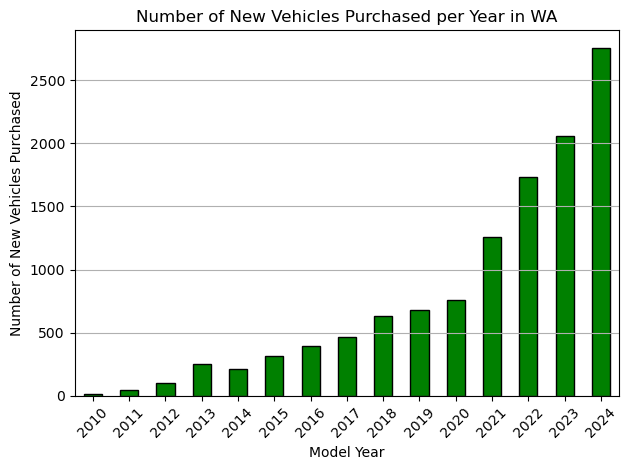

In [3]:
#Group data by 'Year' and count occurences
vehicles_per_year = new_evs.groupby('Year').size()


#Plot a bar graph
vehicles_per_year.plot(kind='bar', color='g', edgecolor='black')
plt.title('Number of New Vehicles Purchased per Year in WA')
plt.xlabel('Model Year')
plt.ylabel('Number of New Vehicles Purchased')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.tight_layout()  
plt.savefig("Outputs/New_Vehicles_bar.png")
plt.show()

Correlation Coefficient between Year and Number of Vehicles Sold: 0.90


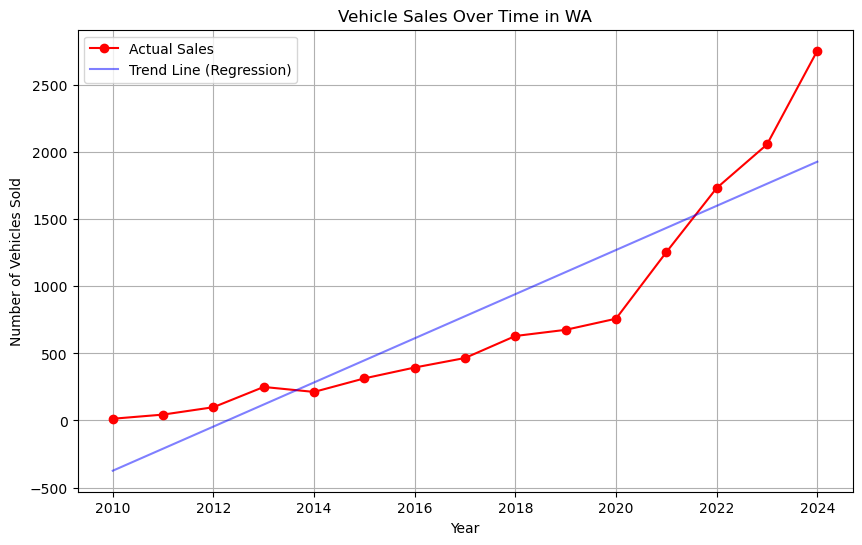

In [9]:
#Get the correlation coefficient between years and number of vehicles sold
vehicles_df = vehicles_per_year.reset_index(name='Number of Vehicles Sold')
correlation = vehicles_df['Year'].corr(vehicles_df['Number of Vehicles Sold'])
print(f"Correlation Coefficient between Year and Number of Vehicles Sold: {correlation:.2f}")

#Line graph of vehicle sales over time
new_evs['Transaction Date'] = pd.to_datetime(new_evs['Transaction Date'], errors='coerce')
sales_over_time = new_evs.groupby(new_evs['Transaction Date'].dt.year).size()

# Prepare data for regression
x = np.array(sales_over_time.index)
y = np.array(sales_over_time.values)

# Calculate the line of best fit
slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept

plt.figure(figsize=(10, 6))
sales_over_time.plot(kind='line', marker='o', color='r', label='Actual Sales')
plt.plot(x, regression_line, color='blue', alpha=0.5, label='Trend Line (Regression)')
plt.title('Vehicle Sales Over Time in WA')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.grid()
plt.legend()
plt.savefig("Outputs/EV_sales_over_time_with_regression.png")
plt.show()

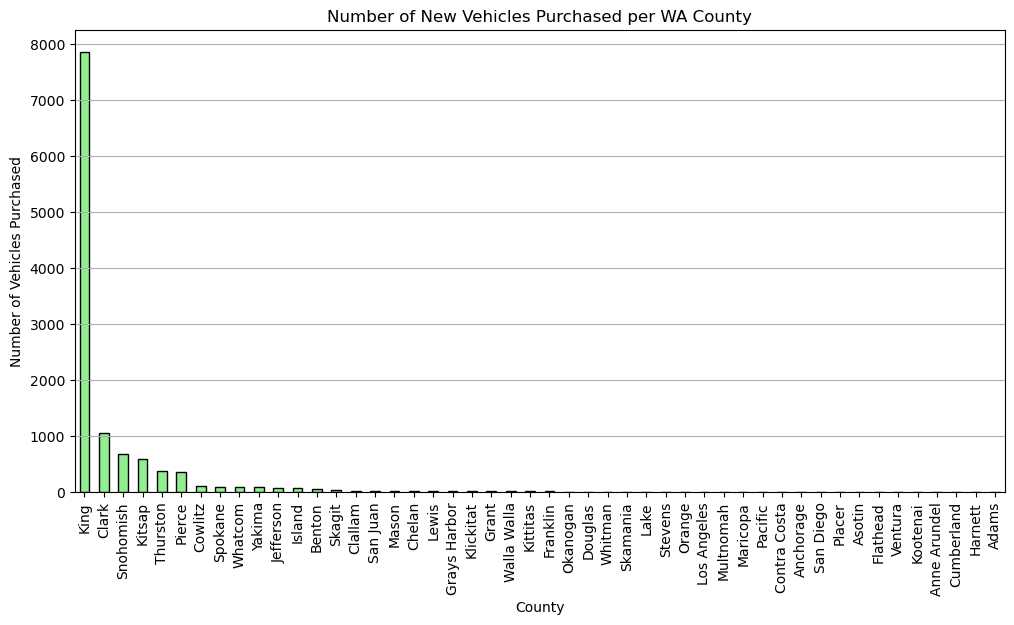

In [5]:
#visualization of new vehicle purchases by county
vehicles_by_county = new_evs['County'].value_counts()
plt.figure(figsize=(12, 6))
vehicles_by_county.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of New Vehicles Purchased per WA County')
plt.xlabel('County')
plt.ylabel('Number of Vehicles Purchased')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.savefig("Outputs/New_EV_per_county.png")
plt.show()